In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from numpy.random import default_rng


import sys
path_to_mavenn_local = '/Users/tareen/Desktop/Research_Projects/2022_mavenn2_github/mavenn'
sys.path.insert(0,path_to_mavenn_local)

import mavenn



In [2]:
MPSA_data_lib1_rep1 = pd.read_csv('data/20.08.16_mpsa_data/brca2_lib1_rep1.csv')
MPSA_data_lib1_rep2 = pd.read_csv('data/20.08.16_mpsa_data/brca2_lib1_rep2.csv')
MPSA_data_lib1_rep3 = pd.read_csv('data/20.08.16_mpsa_data/brca2_lib1_rep3.csv')

MPSA_data_lib2_rep1 = pd.read_csv('data/20.08.16_mpsa_data/brca2_lib2_rep1.csv')
MPSA_data_lib2_rep2 = pd.read_csv('data/20.08.16_mpsa_data/brca2_lib2_rep2.csv')
MPSA_data_lib2_rep3 = pd.read_csv('data/20.08.16_mpsa_data/brca2_lib2_rep3.csv')


In [3]:
#MPSA_df = MPSA_data_lib1_rep1.merge(MPSA_data_lib1_rep2,on='ss')
MPSA_df = MPSA_data_lib1_rep1.merge(MPSA_data_lib1_rep2,on='ss',how='outer') \
                             .merge(MPSA_data_lib1_rep3,on='ss',how='outer')\
                             .merge(MPSA_data_lib2_rep1,on='ss',how='outer')\
                             .merge(MPSA_data_lib2_rep2,on='ss',how='outer')\
                             .merge(MPSA_data_lib2_rep3,on='ss',how='outer')        

print(len(MPSA_df))                
MPSA_df.head()

26661


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/frame.py:9191: FutureWarning: Passing 'suffixes' which cause duplicate columns {'dlog_psi_x', 'log_psi_x'} in the result is deprecated and will raise a MergeError in a future version.
  return merge(


,ss,log_psi_x,dlog_psi_x,log_psi_y,dlog_psi_y,log_psi_x,dlog_psi_x,log_psi_y,dlog_psi_y,log_psi_x,dlog_psi_x,log_psi_y,dlog_psi_y
0,AAAGCAAAA,-3.751854,0.444200,-3.115981,0.404293,-2.690113,0.649725,-2.238407,0.463122,-2.900128,0.667861,-0.824806,0.194917
1,AAAGCAAAC,-2.697741,0.369972,-2.991176,0.552104,-1.690878,0.212487,-1.741498,0.834194,-4.394449,0.375559,-0.813106,0.274446
2,AAAGCAAAG,-2.242947,0.575121,-2.666159,0.413834,-1.716336,0.316662,-3.850148,0.751362,-4.934474,0.266520,-1.062409,0.279566
3,AAAGCAAAT,-3.067251,0.357014,-2.823078,0.343901,-1.837513,0.206056,-3.044522,0.680854,-5.493061,0.230119,-1.241713,0.151308
4,AAAGCAACA,-2.987074,0.472637,-2.489996,0.368131,-2.186586,0.266041,-2.619385,0.631789,-3.571543,0.748902,-1.351066,0.219278


In [4]:
MPSA_df.dropna(inplace=True)
print(len(MPSA_df))  

20700


In [5]:
MPSA_df.columns = ['ss', 'log_psi__lib_1_rep1', 'dlog_psi_x', 'log_psi__lib_1_rep2', 'dlog_psi_y', 'log_psi__lib_1_rep3',
       'dlog_psi_x', 'log_psi__lib_2_rep1', 'dlog_psi_y', 'log_psi__lib_2_rep2', 'dlog_psi_x',
       'log_psi__lib_2_rep3', 'dlog_psi_y']


In [6]:
X = MPSA_df['ss'].values
y1 = MPSA_df['log_psi__lib_1_rep1'].values
y2 = MPSA_df['log_psi__lib_1_rep2'].values
y3 = MPSA_df['log_psi__lib_1_rep3'].values

y4 = MPSA_df['log_psi__lib_2_rep1'].values
y5 = MPSA_df['log_psi__lib_2_rep2'].values
y6 = MPSA_df['log_psi__lib_2_rep3'].values

In [7]:
diag = np.linspace(min(y1),max(y1),100)

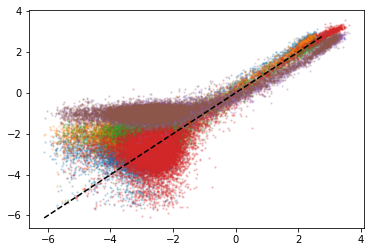

In [8]:
plt.scatter(y1,y2,s=2,alpha=0.2)
plt.scatter(y1,y3,s=2,alpha=0.2)
plt.scatter(y2,y3,s=2,alpha=0.2)

plt.scatter(y4,y5,s=2,alpha=0.2)
plt.scatter(y4,y6,s=2,alpha=0.2)
plt.scatter(y5,y6,s=2,alpha=0.2)

plt.plot(diag,diag,'--',color='black')
plt.show()

In [9]:

y = np.hstack(
    (y1.reshape(-1,1),
     y2.reshape(-1,1),
     y3.reshape(-1,1)))
#      y4.reshape(-1,1),
#      y5.reshape(-1,1),
#      y6.reshape(-1,1)))


In [10]:
y.shape

(20700, 3)

In [11]:
from sklearn.model_selection import train_test_split

# split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
x_train[0]

'AAGGTGCTT'

In [13]:
L = len(x_train[0])
gpmap = mavenn.gpmap.AdditiveGPMapLayer(L, alphabet=['A','C','G','T'])

mp_GE_1 = mavenn.measurement_process_layers.GlobalEpsitasisMP(K=50)
mp_GE_2 = mavenn.measurement_process_layers.GlobalEpsitasisMP(K=50)
mp_GE_3 = mavenn.measurement_process_layers.GlobalEpsitasisMP(K=50)

model = mavenn.Model2(gpmap=gpmap,
                      mp_list=[mp_GE_1,mp_GE_2,mp_GE_3])

2022-04-14 13:07:54.004746: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
# # Get sequence length
# L = len(X[0])

# # Define model
# model = mavenn.Model(L=L,
#                      alphabet='dna',
#                      gpmap_type='additive', 
#                      regression_type='Multi_y_GE',
#                      ge_noise_model_type='SkewedT',
#                      ge_heteroskedasticity_order=2,
#                      #ge_nonlinearity_hidden_nodes=5,
#                      number_of_replicate_targets = y_train.shape[1])

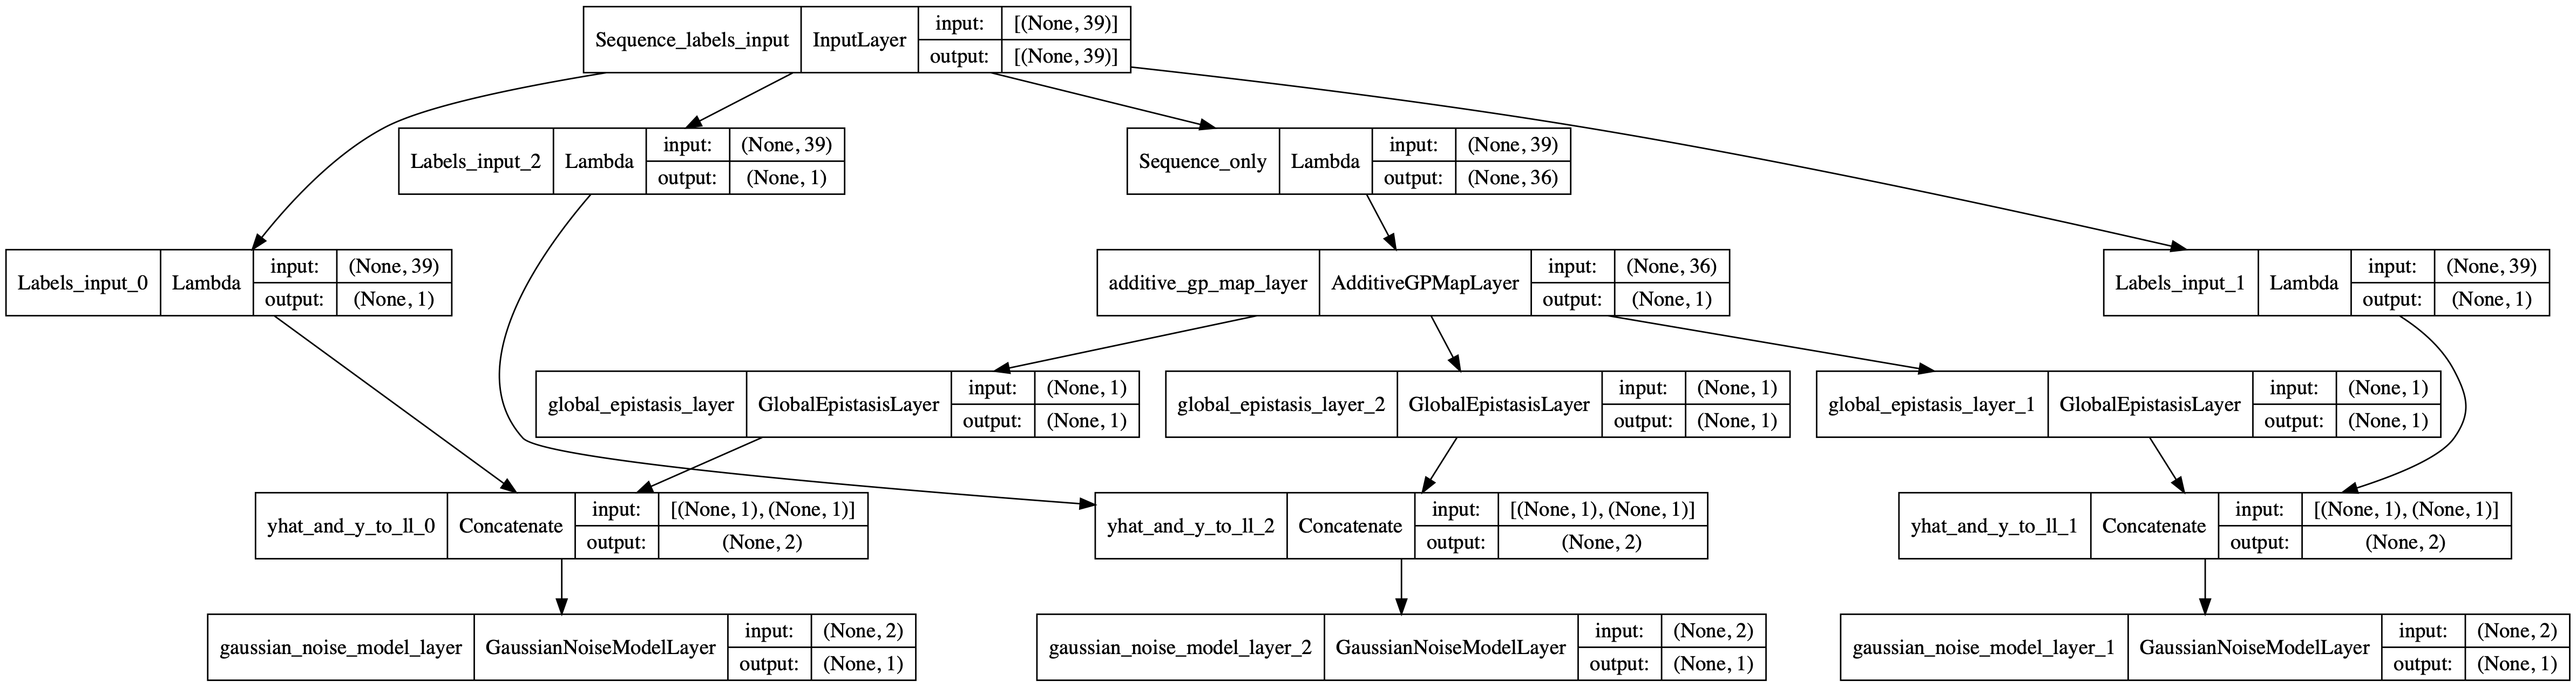

In [15]:

from tensorflow.keras.utils import plot_model
plot_model(model.model,show_shapes=True,show_dtype=False,dpi=200)

In [16]:
#y_list = [y1, y2, y3]
y_list = [y_train[:,0].reshape(-1,1),
          y_train[:,1].reshape(-1,1),
          y_train[:,2].reshape(-1,1)]


In [17]:
# Set training data
model.set_data(x=x_train,
               y_list=y_list,
               shuffle=True)

N = 16,560 observations set as training data.
Using 19.8% for validation.
Data shuffled.
Time to set data: 1.05 sec.


In [18]:
x_train.shape

(16560,)

In [19]:
# Fit model to data
model.fit(learning_rate=.0005,
          epochs=100,
          try_tqdm=False,
          batch_size=50,
          early_stopping=False,
          #early_stopping_patience=30,
          linear_initialization=False)

Epoch 1/100
266/266 [==============================] - 5s 7ms/step - loss: 213.4215 - gaussian_noise_model_layer_loss: 71.1926 - gaussian_noise_model_layer_1_loss: 71.2908 - gaussian_noise_model_layer_2_loss: 70.9327 - I_var: -1.0574 - val_loss: 214.9860 - val_gaussian_noise_model_layer_loss: 71.5562 - val_gaussian_noise_model_layer_1_loss: 71.6546 - val_gaussian_noise_model_layer_2_loss: 71.7699 - val_I_var: -1.0926
Epoch 2/100
266/266 [==============================] - 1s 4ms/step - loss: 211.3643 - gaussian_noise_model_layer_loss: 70.4561 - gaussian_noise_model_layer_1_loss: 70.4381 - gaussian_noise_model_layer_2_loss: 70.4650 - I_var: -1.0444 - val_loss: 214.2844 - val_gaussian_noise_model_layer_loss: 71.3377 - val_gaussian_noise_model_layer_1_loss: 71.4629 - val_gaussian_noise_model_layer_2_loss: 71.4787 - val_I_var: -1.0842
Epoch 3/100
266/266 [==============================] - 1s 4ms/step - loss: 210.1142 - gaussian_noise_model_layer_loss: 70.0341 - gaussian_noise_model_layer_1_

266/266 [==============================] - 1s 3ms/step - loss: 141.8453 - gaussian_noise_model_layer_loss: 48.5721 - gaussian_noise_model_layer_1_loss: 47.3481 - gaussian_noise_model_layer_2_loss: 45.9109 - I_var: -0.3352 - val_loss: 143.7089 - val_gaussian_noise_model_layer_loss: 48.9866 - val_gaussian_noise_model_layer_1_loss: 48.3422 - val_gaussian_noise_model_layer_2_loss: 46.3657 - val_I_var: -0.3520
Epoch 21/100
266/266 [==============================] - 1s 2ms/step - loss: 140.7079 - gaussian_noise_model_layer_loss: 48.2309 - gaussian_noise_model_layer_1_loss: 47.0308 - gaussian_noise_model_layer_2_loss: 45.4316 - I_var: -0.3220 - val_loss: 142.6777 - val_gaussian_noise_model_layer_loss: 48.7451 - val_gaussian_noise_model_layer_1_loss: 48.0493 - val_gaussian_noise_model_layer_2_loss: 45.8686 - val_I_var: -0.3374
Epoch 22/100
266/266 [==============================] - 1s 2ms/step - loss: 139.8130 - gaussian_noise_model_layer_loss: 48.0359 - gaussian_noise_model_layer_1_loss: 46.7

266/266 [==============================] - 1s 3ms/step - loss: 136.8676 - gaussian_noise_model_layer_loss: 47.2269 - gaussian_noise_model_layer_1_loss: 45.9295 - gaussian_noise_model_layer_2_loss: 43.6955 - I_var: -0.2723 - val_loss: 138.7477 - val_gaussian_noise_model_layer_loss: 47.7275 - val_gaussian_noise_model_layer_1_loss: 46.9954 - val_gaussian_noise_model_layer_2_loss: 44.0092 - val_I_var: -0.2833
Epoch 40/100
266/266 [==============================] - 1s 3ms/step - loss: 136.7451 - gaussian_noise_model_layer_loss: 47.1947 - gaussian_noise_model_layer_1_loss: 45.8933 - gaussian_noise_model_layer_2_loss: 43.6415 - I_var: -0.2730 - val_loss: 138.8193 - val_gaussian_noise_model_layer_loss: 47.7540 - val_gaussian_noise_model_layer_1_loss: 47.0283 - val_gaussian_noise_model_layer_2_loss: 44.0214 - val_I_var: -0.2837
Epoch 41/100
266/266 [==============================] - 1s 3ms/step - loss: 136.9327 - gaussian_noise_model_layer_loss: 47.2505 - gaussian_noise_model_layer_1_loss: 45.9

266/266 [==============================] - 1s 2ms/step - loss: 136.8620 - gaussian_noise_model_layer_loss: 47.2084 - gaussian_noise_model_layer_1_loss: 45.9657 - gaussian_noise_model_layer_2_loss: 43.6728 - I_var: -0.2701 - val_loss: 138.6338 - val_gaussian_noise_model_layer_loss: 47.6379 - val_gaussian_noise_model_layer_1_loss: 47.0883 - val_gaussian_noise_model_layer_2_loss: 43.8924 - val_I_var: -0.2800
Epoch 59/100
266/266 [==============================] - 1s 2ms/step - loss: 136.7830 - gaussian_noise_model_layer_loss: 47.2174 - gaussian_noise_model_layer_1_loss: 45.9150 - gaussian_noise_model_layer_2_loss: 43.6354 - I_var: -0.2694 - val_loss: 138.6075 - val_gaussian_noise_model_layer_loss: 47.7466 - val_gaussian_noise_model_layer_1_loss: 46.9043 - val_gaussian_noise_model_layer_2_loss: 43.9415 - val_I_var: -0.2816
Epoch 60/100
266/266 [==============================] - 1s 2ms/step - loss: 136.6339 - gaussian_noise_model_layer_loss: 47.1451 - gaussian_noise_model_layer_1_loss: 45.8

266/266 [==============================] - 1s 2ms/step - loss: 136.7659 - gaussian_noise_model_layer_loss: 47.1965 - gaussian_noise_model_layer_1_loss: 45.9117 - gaussian_noise_model_layer_2_loss: 43.6428 - I_var: -0.2690 - val_loss: 138.5406 - val_gaussian_noise_model_layer_loss: 47.7173 - val_gaussian_noise_model_layer_1_loss: 46.9147 - val_gaussian_noise_model_layer_2_loss: 43.8937 - val_I_var: -0.2801
Epoch 78/100
266/266 [==============================] - 1s 3ms/step - loss: 136.6750 - gaussian_noise_model_layer_loss: 47.1992 - gaussian_noise_model_layer_1_loss: 45.8742 - gaussian_noise_model_layer_2_loss: 43.5869 - I_var: -0.2712 - val_loss: 138.6036 - val_gaussian_noise_model_layer_loss: 47.6625 - val_gaussian_noise_model_layer_1_loss: 46.9947 - val_gaussian_noise_model_layer_2_loss: 43.9314 - val_I_var: -0.2811
Epoch 79/100
266/266 [==============================] - 1s 3ms/step - loss: 136.6998 - gaussian_noise_model_layer_loss: 47.1781 - gaussian_noise_model_layer_1_loss: 45.8

266/266 [==============================] - 1s 5ms/step - loss: 136.7863 - gaussian_noise_model_layer_loss: 47.2319 - gaussian_noise_model_layer_1_loss: 45.9009 - gaussian_noise_model_layer_2_loss: 43.6386 - I_var: -0.2704 - val_loss: 138.4886 - val_gaussian_noise_model_layer_loss: 47.7149 - val_gaussian_noise_model_layer_1_loss: 46.8954 - val_gaussian_noise_model_layer_2_loss: 43.8634 - val_I_var: -0.2792
Epoch 97/100
266/266 [==============================] - 1s 5ms/step - loss: 136.6638 - gaussian_noise_model_layer_loss: 47.1690 - gaussian_noise_model_layer_1_loss: 45.8746 - gaussian_noise_model_layer_2_loss: 43.6054 - I_var: -0.2692 - val_loss: 138.5904 - val_gaussian_noise_model_layer_loss: 47.7470 - val_gaussian_noise_model_layer_1_loss: 46.9278 - val_gaussian_noise_model_layer_2_loss: 43.9009 - val_I_var: -0.2802
Epoch 98/100
266/266 [==============================] - 1s 3ms/step - loss: 136.6638 - gaussian_noise_model_layer_loss: 47.1551 - gaussian_noise_model_layer_1_loss: 45.8

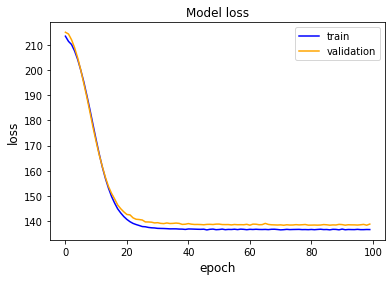

In [20]:
plt.plot(model.history['loss'], color='blue')
plt.plot(model.history['val_loss'], color='orange')
plt.title('Model loss', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.legend(['train', 'validation'])

In [21]:
from mavenn.src.utils import x_to_stats
stats = x_to_stats(x=x_test, alphabet=model.alphabet)
x_ohe_test = stats.pop('x_ohe')

In [22]:
#phi_test = model.x_to_phi(x_test)

In [23]:
#model.get_nn().layers

In [24]:
import tensorflow as tf
import tensorflow.keras.backend as K


y_hat_functions = []
yhats = []

phi_function = K.function([model.model.layers[0].input], [model.model.layers[2].output])
phi_test = np.squeeze(phi_function(np.hstack([x_ohe_test,y_test])))

for _ in range(y_train.shape[1]):
    y_hat_functions.append(K.function([model.model.layers[0].input], [model.model.layers[2*_+3].output]))
    yhats.append(np.squeeze(y_hat_functions[_](np.hstack([x_ohe_test,y_test]))))

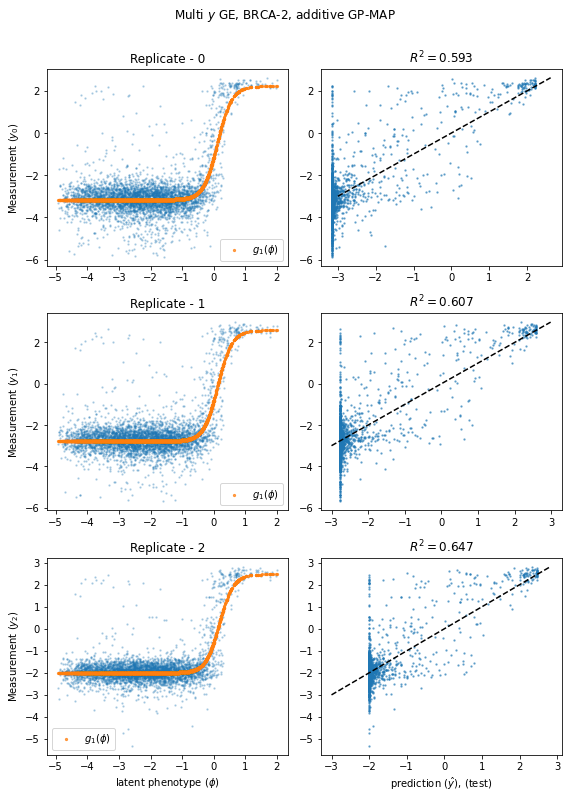

In [25]:
fig, ax = plt.subplots(y_train.shape[1],2,figsize=(8,11))

for _ in range(y_train.shape[1]):

    ax[_,0].set_title(f'Replicate - {_}')
    ax[_,0].scatter(phi_test,y_test[:,_], s=2,alpha=0.25)
    ax[_,0].scatter(phi_test,y_test[:,_].mean()+y_test[:,_].std()*yhats[_],s=5,alpha=0.75,label=f'$g_{1}(\phi)$')
    #ax[_,0].set_xlabel('latent phenotype $(\phi)$')
    ax[_,0].set_ylabel(f'Measurement $(y_{_})$')
    ax[_,0].legend()

    Rsq = np.corrcoef(y_test[:,_].mean()+y_test[:,_].std()*yhats[_],y_test[:,_])[0][1]**2
    ax[_,1].set_title('$R^2 = $' + str(Rsq)[0:5])
    ax[_,1].scatter(y_test[:,_].mean()+y_test[:,_].std()*yhats[_],y_test[:,_],s=2,alpha=0.5)
    #diag = np.linspace(min(y_test[:,_]),max(y_test[:,_]),100)
    diag = np.linspace(-3,max(y_test[:,_]),100)
    ax[_,1].plot(diag,diag,'--',color='black')

ax[_,0].set_xlabel('latent phenotype $(\phi)$')
ax[_,1].set_xlabel('prediction $(\hat y)$, (test)')
    
fig.suptitle('Multi $y$ GE, BRCA-2, additive GP-MAP',y=1.005)    
fig.tight_layout()
#fig.savefig('Multi_y_GE_regression_MPSA.png',bbox_inches='tight',dpi=300)

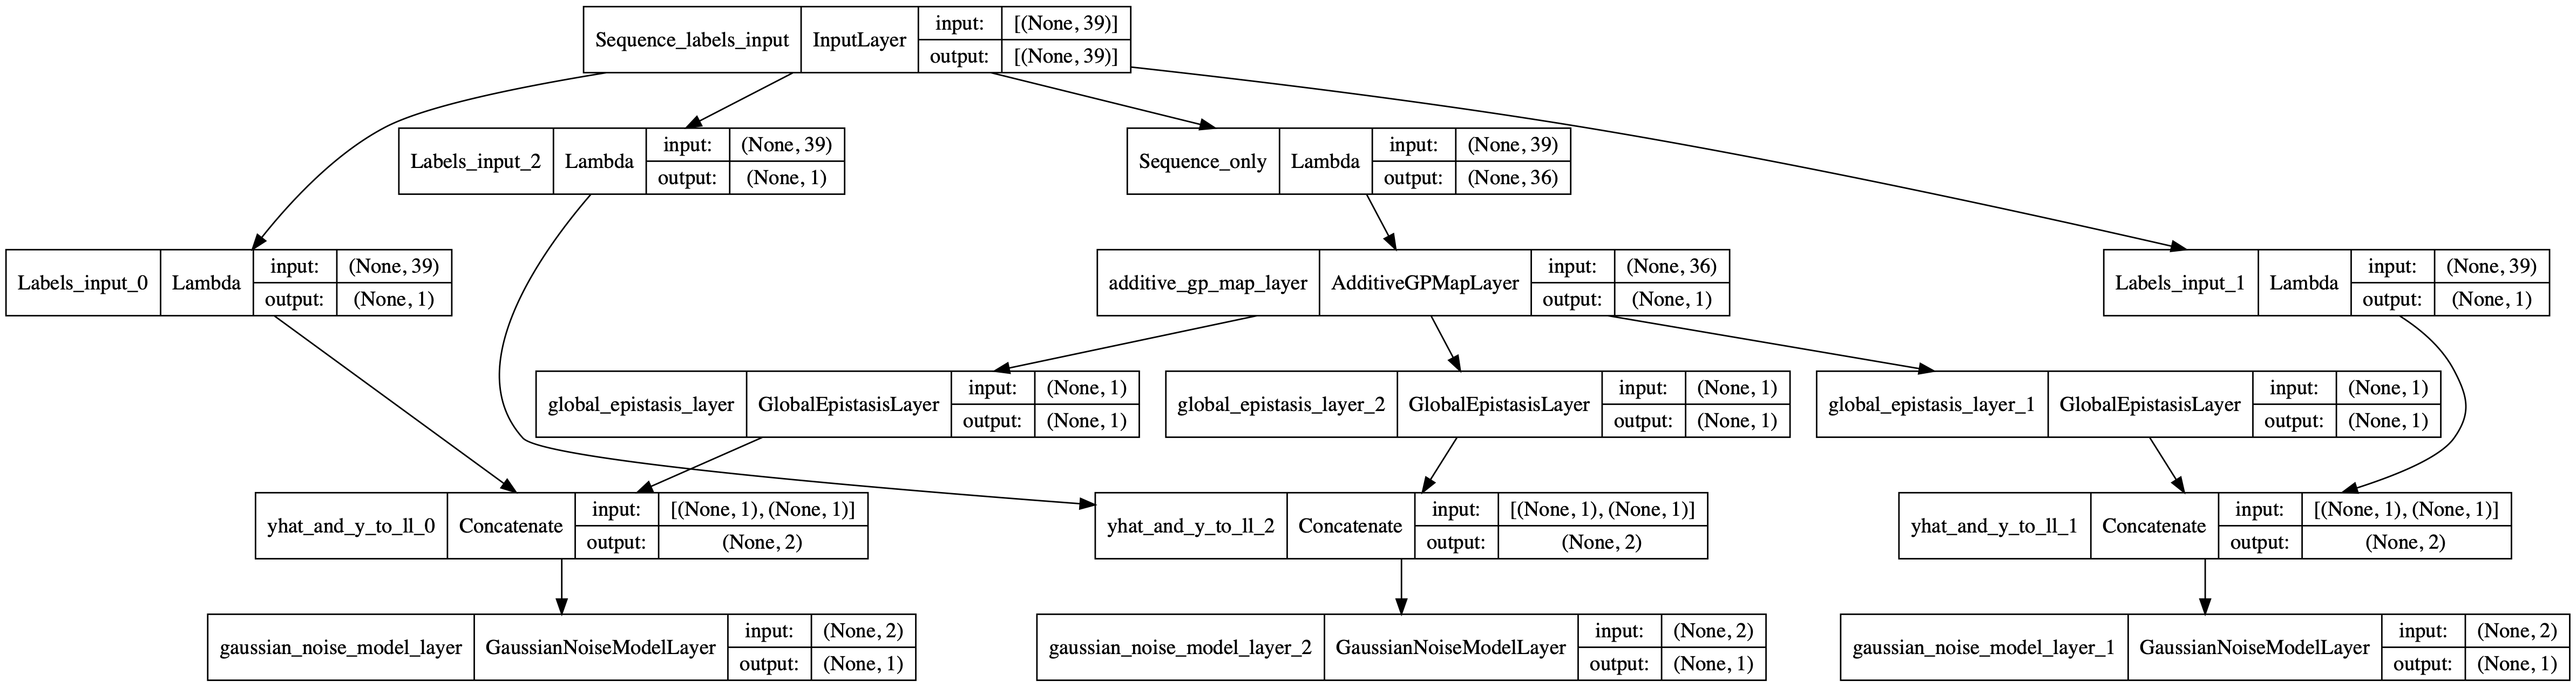

In [26]:

from tensorflow.keras.utils import plot_model
plot_model(model.model,show_shapes=True,show_dtype=False,dpi=200)